In [1]:
! pip install plotly==4.5.0

The system cannot find the path specified.



  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=02b23801898ba88145a43b243129493dc118e43f411b054bb88b245cb9c51896
  Stored in directory: c:\users\shorya sharma\appdata\local\pip\cache\wheels\ce\18\7f\e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [4]:
import json
import numpy as np
import pandas as pd
import plotly.express as px

In [5]:
import plotly.io as pio
pio.renderers.default = 'browser'

In [6]:
india_states = json.load(open("states_india.geojson", "r"))

In [7]:
state_id_map = {}
for feature in india_states["features"]:
    feature["id"] = feature["properties"]["state_code"]
    state_id_map[feature["properties"]["st_nm"]] = feature["id"]

In [8]:
state_id_map

{'Telangana': 0,
 'Andaman & Nicobar Island': 35,
 'Andhra Pradesh': 28,
 'Arunanchal Pradesh': 12,
 'Assam': 18,
 'Bihar': 10,
 'Chhattisgarh': 22,
 'Daman & Diu': 25,
 'Goa': 30,
 'Gujarat': 24,
 'Haryana': 6,
 'Himachal Pradesh': 2,
 'Jammu & Kashmir': 1,
 'Jharkhand': 20,
 'Karnataka': 29,
 'Kerala': 32,
 'Lakshadweep': 31,
 'Madhya Pradesh': 23,
 'Maharashtra': 27,
 'Manipur': 14,
 'Chandigarh': 4,
 'Puducherry': 34,
 'Punjab': 3,
 'Rajasthan': 8,
 'Sikkim': 11,
 'Tamil Nadu': 33,
 'Tripura': 16,
 'Uttar Pradesh': 9,
 'Uttarakhand': 5,
 'West Bengal': 19,
 'Odisha': 21,
 'Dadara & Nagar Havelli': 26,
 'Meghalaya': 17,
 'Mizoram': 15,
 'Nagaland': 13,
 'NCT of Delhi': 7}

In [10]:
df = pd.read_csv("india_census.csv")
df["Density"] = df["Density[a]"].apply(lambda x: int(x.split("/")[0].replace(",", "")))
df["id"] = df["State or union territory"].apply(lambda x: state_id_map[x])

In [11]:
df["DensityScale"] = np.log10(df["Density"])

<AxesSubplot:>

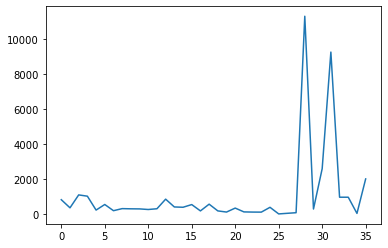

In [12]:
df["Density"].plot()

<AxesSubplot:>

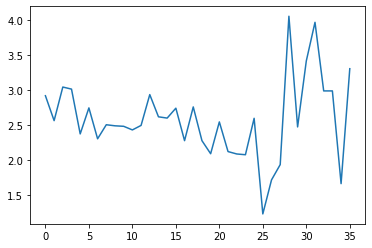

In [13]:
df['DensityScale'].plot()

In [16]:
df.head()

,Rank,State or union territory,Population,Population (%),Decadal growth(2001–2011),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio,Density,id,DensityScale
0,1.0,Uttar Pradesh,199812341,NaN,20.20%,155317278,NaN,44495063,NaN,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,828,9,2.918030
1,2.0,Maharashtra,112374333,NaN,20.00%,61556074,NaN,50818259,NaN,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,365,27,2.562293
2,3.0,Bihar,104099452,NaN,25.40%,92341436,NaN,11758016,NaN,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,1102,10,3.042182
3,4.0,West Bengal,91276115,NaN,13.80%,62183113,NaN,29093002,NaN,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029,19,3.012415
4,5.0,Madhya Pradesh,72626809,NaN,16.30%,52557404,NaN,20069405,NaN,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931,236,23,2.372912


In [20]:
df['R/U_ratio'] = df['Rural population']//df['Urban population']
df.head()

,Rank,State or union territory,Population,Population (%),Decadal growth(2001–2011),Rural population,Percent rural,Urban population,Percent urban,Area[16],Density[a],Sex ratio,Density,id,DensityScale,U/R_ratio,R/U_ratio
0,1.0,Uttar Pradesh,199812341,NaN,20.20%,155317278,NaN,44495063,NaN,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912,828,9,2.918030,3,3
1,2.0,Maharashtra,112374333,NaN,20.00%,61556074,NaN,50818259,NaN,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929,365,27,2.562293,1,1
2,3.0,Bihar,104099452,NaN,25.40%,92341436,NaN,11758016,NaN,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918,1102,10,3.042182,7,7
3,4.0,West Bengal,91276115,NaN,13.80%,62183113,NaN,29093002,NaN,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953,1029,19,3.012415,2,2
4,5.0,Madhya Pradesh,72626809,NaN,16.30%,52557404,NaN,20069405,NaN,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931,236,23,2.372912,2,2


In [21]:
fig = px.choropleth(
    df,
    locations="id",
    geojson=india_states,
    color="R/U_ratio",
    hover_name="State or union territory",
    hover_data=["U/R_ratio"],
    title="Rural to Urban people ratio",
)
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [15]:
fig = px.choropleth_mapbox(
    df,
    locations="id",
    geojson=india_states,
    color="DensityScale",
    hover_name="State or union territory",
    hover_data=["Density"],
    title="India Population Density",
    mapbox_style="carto-positron",
    center={"lat": 24, "lon": 78},
    zoom=3,
    opacity=0.5,
)
fig.show()